# Asynchronous Advantage Actor-Critic (A3C) with Curiosity-driven Exploration by Self-supervised Prediction

* Original Version by [uvipen](https://github.com/uvipen)
* Full Implementation: [Street-fighter-A3C-ICM-pytorch](https://github.com/uvipen/Street-fighter-A3C-ICM-pytorch)
* A3C Paper: [Asynchronous Methods for Deep Reinforcement Learning](https://arxiv.org/abs/1602.01783)
* Curiosity Driven RL: [Curiosity-driven Exploration by Self-supervised Prediction](https://arxiv.org/abs/1705.05363)
* Curiosity Driven RL Website: [Official ICM](https://pathak22.github.io/noreward-rl/)
* MameToolkit: [Github link](https://github.com/M-J-Murray/MAMEToolkit)
* A3C Tutorial: [RL A3C Medium](https://awjuliani.medium.com/simple-reinforcement-learning-with-tensorflow-part-8-asynchronous-actor-critic-agents-a3c-c88f72a5e9f2)
* StreetFight Retro RL Train: [Youtube Tutorial With Github](https://youtu.be/rzbFhu6So5U?si=wBQGrpYgmk9IWBqA)
* gym Retro: [Documentation](https://retro.readthedocs.io/en/latest/getting_started.html)
* Stable Gym Retro: [Github + Documentation](https://github.com/Farama-Foundation/stable-retro)
* Kungfu with A2C & GRUs: [Notebook](https://gist.github.com/justheuristic/1fc96a9632f51b3aab41772be129d077#file-reproducing-deep-kung-fu-with-grus-and-a2c-algorithm-openai-gym-1-ipynb)

# A3C

<center><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*YtnGhtSAMnnHSL8PvS7t_w.png" title="A3C High Level Architecture" width="550"/></center>
<center>A3C High Level Architecture</center>
<br />

A3C, **Asynchronous Advantage Actor Critic**, is a policy gradient algorithm in reinforcement learning that maintains a policy $\normalsize π(a_t | s_t; θ)$ and an estimate of the value function $\normalsize V(s_t; θ_v)$. It operates in the forward view and uses a mix of n-step returns to update both the policy and the value-function. The policy and the value function are updated after every t_max actions or when a terminal state is reached. The update performed by the algorithm can be seen as $\normalsize ∇_θ log π(a_t | s_t; θ') A(s_t, a_t; θ, θ_v)$ where $\normalsize A(s_t, a_t; θ, θ_v)$ is an estimate of the advantage function given by:

$$\large
∑_{i=0}^{k-1} γ^i r_{t+i} + γ^k V(s_{t+k}; θ_v) - V(s_t; θ_v)
$$

where k can vary from state to state and is upper-bounded by t_max.

The critics in A3C learn the value function while multiple actors are trained in parallel and get synced with global parameters every so often. The gradients are accumulated as part of training for stability - this is like parallelized stochastic gradient descent.

Note that while the parameters θ of the policy and $\normalsize θ_v$ of the value function are shown as being separate for generality, we always share some of the parameters in practice. We typically use a convolutional neural network that has one softmax output for the policy $\normalsize π(a_t | s_t; θ)$ and one linear output for the value function $\normalsize V(s_t; θ_v)$, with all non-output layers shared.   [Definition From: [PapersWithCode](https://paperswithcode.com/method/a3c#:~:text=A3C%2C%20Asynchronous%20Advantage%20Actor%20Critic,policy%20and%20the%20value%2Dfunction.)]

# Intrinsic Curiosity Module (ICM)

The idea of Intrinsic Curiosity Module is to build a reward function that is intrinsic to the agent (generated by the agent itself). It means that the agent will be a self-learner since he will be the son but also the father. Curiosity helps agent discover the environment out of curiosity when extrinsic rewards are spare or not present at all. The proposed intrinsic model (ICM) in the [paper](https://pathak22.github.io/noreward-rl/resources/icml17.pdf) is learned jointly with agent's policy even without any rewards from the environment. A glimpse of the model from the paper is shown in figure below

![ICM](https://pathak22.github.io/noreward-rl/resources/method.jpg)
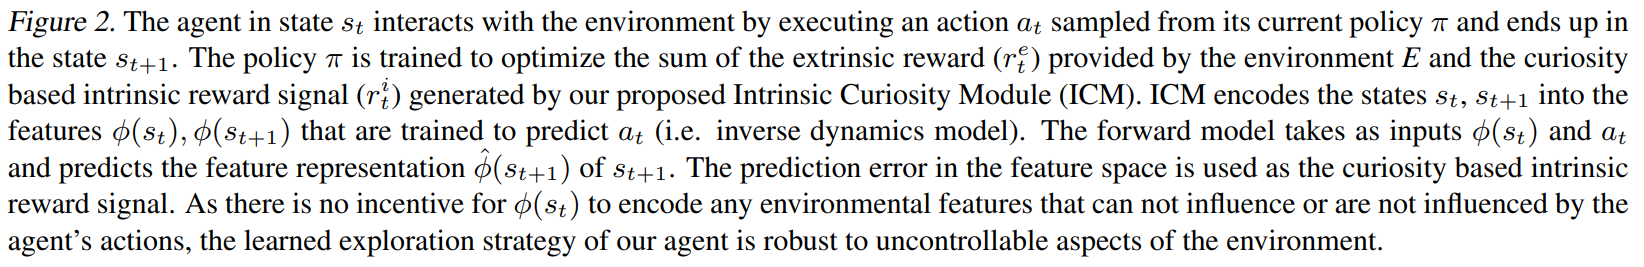

**N.B** I tried to implement in MAMEToolkit ofr Street Fighter environment in 3 different ways. In kaggle, in local windows and in local linux environment. But I failed to successfully run this on any environment. So I switched to gym environment and tested this implementation

## Import 

In [1]:
# !pip install MAMEToolkit

In [1]:
!pip install gym
!pip install gym[atari,accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.6 MB/s eta 0:00:0000:0100:01
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446661 sha256=51136c5bcae021f93c9d5139cc007c32df95bbc8a15e6199ce58667af82e0aa9
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [2]:
!apt install swig cmake
!pip install swig

!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay
!pip install pyglet==1.5.1

!pip install moviepy==1.0.3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 75 not upgraded.
Need to get 1086 kB of archives.
After this operation, 5413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5528 B]
Fetched 1086 kB in 0s (2546 kB/s)0m

78Selecting previously unselected package swig4.0.
(Reading database ... 113807 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.1-5build1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 11%] [######...................

In [4]:
# import os
# os.kill(os.getpid(), 9)

In [3]:
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [16]:
import cv2
import math
import numpy as np
import subprocess as sp
# from MAMEToolkit.sf_environment import Environment
# import retro
import gym

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
import torch.multiprocessing as _mp

from tensorboardX import SummaryWriter
import timeit
import argparse
import shutil

import os
os.environ['OMP_NUM_THREADS'] = '1'

from PIL import Image

from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib

from IPython.display import HTML

from pathlib import Path
import datetime
import json
import imageio
import IPython
import base64

import warnings
warnings.filterwarnings("ignore")

As we are using multiprocessing which has a problem to work with directly notebook environment, we will write different files and import accordingly

# Environment

In [1]:
%%writefile env.py

import cv2
import gym
import numpy as np
import subprocess as sp
# from MAMEToolkit.sf_environment import Environment
# import retro

Overwriting env.py


## Preprocessing 

In [2]:
%%writefile -a env.py

def process_frame(frame):
    if frame is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = cv2.resize(frame, (168, 168))[None, :, :] / 255.0
        return frame
    else:
        return np.zeros((1, 168, 168))

Appending to env.py


## Monitor Wrapper

In [3]:
%%writefile -a env.py

class Monitor:
    def __init__(self, width, height, saved_path):

        self.command = ["ffmpeg", "-y", "-f", "rawvideo", "-vcodec", "rawvideo", "-s", 
                        "{}X{}".format(width, height), "-pix_fmt", "rgb24", "-r", "60", 
                        "-i", "-", "-an", "-vcodec", "mpeg4", saved_path]
        try:
            self.pipe = sp.Popen(self.command, stdin=sp.PIPE, stderr=sp.PIPE)
        except FileNotFoundError:
            pass

    def record(self, image_array):
        self.pipe.stdin.write(image_array.tostring())

Appending to env.py


## KungFuMaster Environment

In [4]:
%%writefile -a env.py

class KungFuMasterEnv(object):
    def __init__(self, index, monitor = None):
        self.env = gym.make("ALE/KungFuMaster-v5", render_mode="rgb_array")
        if monitor:
            self.monitor = monitor
        else:
            self.monitor = None
        self.env.reset()

    def step(self, action):
        frames, reward, terminated, truncated, info = self.env.step(action)
        game_done = terminated or truncated
        
        if self.monitor:
            self.monitor.record(frames)
            
        frames = process_frame(frames)[None, :, :, :].astype(np.float32)
        
        return frames, reward, game_done

    def reset(self):
        frames, _ = self.env.reset()
        return process_frame(frames)[None, :, :, :].astype(np.float32)

Appending to env.py


In [5]:
%%writefile -a env.py

def create_train_env(index, output_path=None):
    num_inputs = 1
    num_actions = gym.make("ALE/KungFuMaster-v5", render_mode="rgb_array").action_space.n
    if output_path:
        monitor = Monitor(160, 210, output_path)
    else:
        monitor = None
    env = KungFuMasterEnv(index, monitor)
    return env, num_inputs, num_actions

Appending to env.py


## Models 

In [6]:
%%writefile model.py
import torch
import torch.nn as nn

Overwriting model.py


# CNN Model

In [7]:
%%writefile -a model.py

class BaseConv(nn.Module):
    def __init__(self, num_inputs):
        super(BaseConv, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(num_inputs, 64, 3, stride=2, padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(64, 64, 3, stride=2, padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(64, 64, 3, stride=2, padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(64, 64, 3, stride=2, padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(64, 64, 3, stride=2, padding=1),
                                  nn.ReLU()
                                  )

    def forward(self, x):
        return self.conv(x)

Appending to model.py


# Actor Critic Model with LSTM

In [8]:
%%writefile -a model.py

class ActorCritic(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(ActorCritic, self).__init__()
        self.conv = BaseConv(num_inputs)
        self.lstm = nn.LSTMCell(64 * 6 * 6, 1024)
        self.critic_linear = nn.Linear(1024, 1)
        self.actor_linear = nn.Linear(1024, num_actions)
        self._initialize_weights()

    def _initialize_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                # nn.init.kaiming_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.LSTMCell):
                nn.init.constant_(module.bias_ih, 0)
                nn.init.constant_(module.bias_hh, 0)

    def forward(self, x, hx, cx):
        x = self.conv(x)
        hx, cx = self.lstm(x.view(x.size(0), -1), (hx, cx))
        return self.actor_linear(hx), self.critic_linear(hx), hx, cx

Appending to model.py


# ICM Model

In [9]:
%%writefile -a model.py

class IntrinsicCuriosityModule(nn.Module):
    def __init__(self, num_inputs, num_actions):
        super(IntrinsicCuriosityModule, self).__init__()
        self.conv = BaseConv(num_inputs)
        self.feature_size = 64 * 6 * 6
        self.inverse_net = nn.Sequential(
            nn.Linear(self.feature_size * 2, 1024),
            nn.LeakyReLU(),
            nn.Linear(1024, num_actions)
        )
        self.forward_net = nn.Sequential(
            nn.Linear(self.feature_size + num_actions, 1024),
            nn.LeakyReLU(),
            nn.Linear(1024, self.feature_size)
        )
        self._initialize_weights()

    def _initialize_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Conv2d) or isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                # nn.init.kaiming_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)

    def forward(self, state, next_state, action):
        state_ft = self.conv(state)
        next_state_ft = self.conv(next_state)
        state_ft = state_ft.view(-1, self.feature_size)
        next_state_ft = next_state_ft.view(-1, self.feature_size)
        return self.inverse_net(torch.cat((state_ft, next_state_ft), 1)), self.forward_net(
            torch.cat((state_ft, action), 1)), next_state_ft

Appending to model.py


# Optimizer

In [10]:
%%writefile optimizer.py
import torch
import math

Overwriting optimizer.py


In [11]:
%%writefile -a optimizer.py

class GlobalAdam(torch.optim.Adam):
    def __init__(self, params, lr):
        super(GlobalAdam, self).__init__(params, lr=lr)
        for group in self.param_groups:
            for p in group['params']:
                state = self.state[p]
                state['step'] = torch.zeros(1)
                state['exp_avg'] = torch.zeros_like(p.data)
                state['exp_avg_sq'] = torch.zeros_like(p.data)
                state['step'].share_memory_()
                state['exp_avg'].share_memory_()
                state['exp_avg_sq'].share_memory_()

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad = grad.add(group['weight_decay'], p.data)

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)

                denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step'].item()
                bias_correction2 = 1 - beta2 ** state['step'].item()
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                p.data.addcdiv_(-step_size, exp_avg, denom)

        return loss

Appending to optimizer.py


# Training Utilities

In [60]:
%%writefile process.py
import torch
from env import create_train_env
from model import ActorCritic, IntrinsicCuriosityModule
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
from tensorboardX import SummaryWriter
import timeit

Overwriting process.py


## Local Training Function 

In [61]:
%%writefile -a process.py

def local_train(index, opt, global_model, global_icm, optimizer, save=False):
    torch.manual_seed(123 + index)
    if save:
        start_time = timeit.default_timer()
    writer = SummaryWriter(opt.log_path)
    env, num_states, num_actions = create_train_env(index+1)
    local_model = ActorCritic(num_states, num_actions)
    local_icm = IntrinsicCuriosityModule(num_states, num_actions)
    
    if opt.use_gpu:
        local_model.cuda()
        local_icm.cuda()
    local_model.train()
    local_icm.train()
    inv_criterion = nn.CrossEntropyLoss()
    fwd_criterion = nn.MSELoss()
    state = torch.from_numpy(env.reset())
    if opt.use_gpu:
        state = state.cuda()
    game_done = True
    curr_step = 0
    curr_episode = 0
    
    while True:
        if save:
            if curr_episode % opt.save_interval == 0 and curr_episode > 0:
                torch.save(global_model.state_dict(),
                           "{}/a3c_kungfu_master".format(opt.saved_path))
                torch.save(global_icm.state_dict(),
                           "{}/icm_kungfu_master".format(opt.saved_path))
        curr_episode += 1
        local_model.load_state_dict(global_model.state_dict())
#         local_icm.load_state_dict(global_icm.state_dict())   # modification
        
        if game_done:
            h_0 = torch.zeros((1, 1024), dtype=torch.float)
            c_0 = torch.zeros((1, 1024), dtype=torch.float)
        else:
            h_0 = h_0.detach()
            c_0 = c_0.detach()
        if opt.use_gpu:
            h_0 = h_0.cuda()
            c_0 = c_0.cuda()

        log_policies = []
        values = []
        rewards = []
        entropies = []
        inv_losses = []
        fwd_losses = []

        for _ in range(opt.num_local_steps):
            curr_step += 1
            logits, value, h_0, c_0 = local_model(state, h_0, c_0)
            logits = logits / 255.   # modification otherwise, always same action
            policy = F.softmax(logits, dim=1)
            log_policy = F.log_softmax(logits, dim=1)
            entropy = -(policy * log_policy).sum(1, keepdim=True)

            m = Categorical(policy)
            action = m.sample().item()
#             print(action)

            next_state, reward, game_done = env.step(action)
            next_state = torch.from_numpy(next_state)
            if opt.use_gpu:
                next_state = next_state.cuda()
            action_oh = torch.zeros((1, num_actions))  # one-hot action
            action_oh[0, action] = 1
            
            if opt.use_gpu:
                action_oh = action_oh.cuda()
            pred_logits, pred_phi, phi = local_icm(state, next_state, action_oh)
#             pred_logits = pred_logits / 255.     # modification
            
            if opt.use_gpu:
                inv_loss = inv_criterion(pred_logits, torch.tensor([action]).cuda())
            else:
                inv_loss = inv_criterion(pred_logits, torch.tensor([action]))
                
            fwd_loss = fwd_criterion(pred_phi, phi) / 2
            intrinsic_reward = opt.eta * fwd_loss.detach()
            reward += intrinsic_reward

            if curr_step > opt.num_global_steps:
                game_done = True

            if game_done:
                curr_step = 0
                next_state = torch.from_numpy(env.reset())
                if opt.use_gpu:
                    next_state = next_state.cuda()

            values.append(value)
            log_policies.append(log_policy[0, action])
            rewards.append(reward)
            entropies.append(entropy)
            inv_losses.append(inv_loss)
            fwd_losses.append(fwd_loss)
            state = next_state
            if game_done:
                break

        R = torch.zeros((1, 1), dtype=torch.float)
        if opt.use_gpu:
            R = R.cuda()
        if not (game_done):
            _, R, _, _ = local_model(state, h_0, c_0)

        gae = torch.zeros((1, 1), dtype=torch.float)
        if opt.use_gpu:
            gae = gae.cuda()
        actor_loss = 0
        critic_loss = 0
        entropy_loss = 0
        curiosity_loss = 0
        next_value = R

        for value, log_policy, reward, entropy, inv, fwd in list(
                zip(values, log_policies, rewards, entropies, inv_losses, fwd_losses))[::-1]:
            gae = gae * opt.gamma * opt.tau
            gae = gae + reward + opt.gamma * next_value.detach() - value.detach()
            next_value = value
            actor_loss = actor_loss + log_policy * gae
            R = R * opt.gamma + reward
            critic_loss = critic_loss + (R - value) ** 2 / 2
            entropy_loss = entropy_loss + entropy
            curiosity_loss = curiosity_loss + (1 - opt.beta) * inv + opt.beta * fwd

        total_loss = opt.lambda_ * (-actor_loss + critic_loss - opt.sigma * entropy_loss) + curiosity_loss
        writer.add_scalar("Train_{}/Loss".format(index), total_loss, curr_episode)
        if save:
            print("Process {}. Action {}. Episode {}. Loss: {}".format(index, action, curr_episode, total_loss))
        optimizer.zero_grad()
        total_loss.backward()

        for local_param, global_param in zip(local_model.parameters(), global_model.parameters()):
            if global_param.grad is not None:
                break
            global_param._grad = local_param.grad
        for local_param, global_param in zip(local_icm.parameters(), global_icm.parameters()):
            if global_param.grad is not None:
                break
            global_param._grad = local_param.grad

        optimizer.step()

        if curr_episode == int(opt.num_global_steps / opt.num_local_steps):
            print("Training process {} terminated".format(index))
            if save:
                end_time = timeit.default_timer()
                print('The code runs for %.2f s ' % (end_time - start_time))
            return

Appending to process.py


# Train Final Agent

In [64]:
%%writefile train.py
import os
os.environ['OMP_NUM_THREADS'] = '1'

import argparse
import torch
from model import ActorCritic, IntrinsicCuriosityModule
from optimizer import GlobalAdam
from process import local_train
import torch.multiprocessing as _mp
import shutil
import gym

Overwriting train.py


## Training Arguments Parser 

In [65]:
%%writefile -a train.py

def get_train_args():
    parser = argparse.ArgumentParser("A3C_ICM_KungFU_Master")
    parser.add_argument('--lr', type=float, default=0.0002)
    parser.add_argument('--gamma', type=float, default=0.99, help='discount factor for rewards')
    parser.add_argument('--tau', type=float, default=1.0, help='parameter for GAE')
    parser.add_argument('--sigma', type=float, default=0.01, help='entropy coefficient')
    parser.add_argument('--lambda_', type=float, default=0.1, help='a3c loss coefficient')
    parser.add_argument('--eta', type=float, default=0.2, help='intrinsic coefficient')
    parser.add_argument('--beta', type=float, default=0.2, help='curiosity coefficient')
    parser.add_argument("--num_local_steps", type=int, default=50)
    parser.add_argument("--num_global_steps", type=int, default=1e7)   # modified for kungfu 
    parser.add_argument("--num_processes", type=int, default=3)
    parser.add_argument("--save_interval", type=int, default=100, help="Number of steps between savings")
    parser.add_argument("--max_actions", type=int, default=500, help="Maximum repetition steps in test phase")
    parser.add_argument("--log_path", type=str, default="tensorboard/a3c_icm_kungfu_master")
    parser.add_argument("--saved_path", type=str, default="trained_models")
    parser.add_argument("--use_gpu", type=bool, default=True)
    parser.add_argument("--load_prev", type=bool, default=True)
#     args = parser.parse_args()
    args, unknown = parser.parse_known_args()
    return args

Appending to train.py


## Final Train 

In [66]:
%%writefile -a train.py

def train(opt):
    torch.manual_seed(123)
    if os.path.isdir(opt.log_path):
        shutil.rmtree(opt.log_path)
    os.makedirs(opt.log_path)
    if not os.path.isdir(opt.saved_path):
        os.makedirs(opt.saved_path)
    mp = _mp.get_context("spawn")
    
    tmp = gym.make("ALE/KungFuMaster-v5", render_mode="rgb_array").action_space.n
    global_model = ActorCritic(num_inputs=1, num_actions=tmp)
    global_icm = IntrinsicCuriosityModule(num_inputs=1, num_actions=tmp)
    
    if opt.load_prev:
        if opt.use_gpu:
            global_model.load_state_dict(torch.load("{}/a3c_kungfu_master".format(opt.saved_path)))
            global_icm.load_state_dict(torch.load("{}/icm_kungfu_master".format(opt.saved_path)))
        else:
            global_model.load_state_dict(torch.load("{}/a3c_kungfu_master".format(opt.saved_path),
                                             map_location=lambda storage, loc: storage))
            global_icm.load_state_dict(torch.load("{}/icm_kungfu_master".format(opt.saved_path),
                                             map_location=lambda storage, loc: storage))
        
    if opt.use_gpu:
        global_model.cuda()
        global_icm.cuda()
        
    global_model.share_memory()
    global_icm.share_memory()
    
#     # modification
#     global_model.train()
#     global_icm.train()

    optimizer = GlobalAdam(list(global_model.parameters()) + list(global_icm.parameters()), lr=opt.lr)
    processes = []
    for index in range(opt.num_processes):
        if index == 0:
            process = mp.Process(target=local_train, args=(index, opt, global_model, global_icm, optimizer, True))
        else:
            process = mp.Process(target=local_train, args=(index, opt, global_model, global_icm, optimizer, True))
        process.start()
        processes.append(process)
    for process in processes:
        process.join()

Appending to train.py


In [67]:
%%writefile -a train.py

if __name__ == '__main__':
    opt = get_train_args()
    print(opt)
    train(opt)

Appending to train.py


In [ ]:
!python train.py

Namespace(lr=0.0002, gamma=0.99, tau=1.0, sigma=0.01, lambda_=0.1, eta=0.2, beta=0.2, num_local_steps=50, num_global_steps=10000000.0, num_processes=3, save_interval=100, max_actions=500, log_path='tensorboard/a3c_icm_kungfu_master', saved_path='trained_models', use_gpu=True, load_prev=True)
A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/opt/conda/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
Process 0. Action 5. Episode 1. Loss: tensor([[94.1195]], device='cuda:0', grad_fn=<AddBackward0>)
A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/kaggle/working/optimizer.py:38: UserWarning: This overload of add_ i

# Evaluate Agent & Render Video

## Evaluation Arguments Parser 

In [7]:
%%writefile test.py
import os
os.environ['OMP_NUM_THREADS'] = '1'

import gym
import cv2
import argparse
import torch
from env import create_train_env
from model import ActorCritic
import torch.nn.functional as F
from torch.distributions import Categorical
import numpy as np

Overwriting test.py


In [8]:
%%writefile -a test.py

def get_eval_args():
    parser = argparse.ArgumentParser(
        """Implementation of model described in the paper: Curiosity-driven Exploration by Self-supervised Prediction for kungfu master""")
    parser.add_argument("--saved_path", type=str, default="trained_models")
    parser.add_argument("--output_path", type=str, default="results")
#     args = parser.parse_args()
    args, unknown = parser.parse_known_args()
    return args

Appending to test.py


## Evaluation  

In [9]:
%%writefile -a test.py

def evaluate(opt):
#     torch.manual_seed(123)
    env, num_states, num_actions = create_train_env(0, "{}/video.mp4".format(opt.output_path))
    model = ActorCritic(num_states, num_actions)
    if torch.cuda.is_available():
        model.load_state_dict(torch.load("{}/a3c_kungfu_master".format(opt.saved_path)))
        model.cuda()
    else:
        model.load_state_dict(torch.load("{}/a3c_kungfu_master".format(opt.saved_path),
                                         map_location=lambda storage, loc: storage))
    
    model.eval()
    
    episode_rewards = []
    
    for episode in range(10):
        state = torch.from_numpy(env.reset())
        done = True

        total_rewards_ep = 0

        while True:
            if done:
                h_0 = torch.zeros((1, 1024), dtype=torch.float)
                c_0 = torch.zeros((1, 1024), dtype=torch.float)
            else:
                h_0 = h_0.detach()
                c_0 = c_0.detach()
            if torch.cuda.is_available():
                h_0 = h_0.cuda()
                c_0 = c_0.cuda()
                state = state.cuda()

            logits, value, h_0, c_0 = model(state, h_0, c_0)
            logits = logits / 255.0   # modification otherwise, always same action
            policy = F.softmax(logits, dim=1)
            m = Categorical(policy)
            action = m.sample().item()
            
#             action = torch.argmax(policy).item()
#             print(action)

            state, reward, done = env.step(action)
            total_rewards_ep += reward
            state = torch.from_numpy(state)
            if done:
                state = torch.from_numpy(env.reset())
                print("Game over")
                break

        print(total_rewards_ep)
        episode_rewards.append(total_rewards_ep)
        
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)

    return mean_reward, std_reward
    
if __name__ == '__main__':
    opt = get_eval_args()
    mean_reward, std_reward = evaluate(opt)
    print(mean_reward, std_reward)

Appending to test.py


In [10]:
!python test.py

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/opt/conda/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
Game over
4600.0
Game over
6100.0
Game over
3900.0
Game over
8200.0
Game over
5400.0
Game over
5800.0
Game over
5900.0
Game over
4400.0
Game over
4200.0
Game over
5800.0
5430.0 1192.5183436744276


## Render Video 

In [14]:
from IPython.display import HTML

from pathlib import Path
import datetime
import json
import imageio
import IPython
import base64

def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename,'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="480" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(b64.decode())
    return IPython.display.HTML(tag)

os.system('ffmpeg -i /kaggle/working/results/video.mp4 replay.mp4 -y')
embed_mp4('/kaggle/working/replay.mp4')

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

# Push to HuggingFace

In [18]:
from huggingface_hub import notebook_login, login
from huggingface_hub import HfApi, snapshot_download
from huggingface_hub.repocard import metadata_eval_result, metadata_save

from pathlib import Path
import datetime
import json
import os
import imageio

import tempfile

from test import get_eval_args, evaluate
from model import ActorCritic, IntrinsicCuriosityModule
from env import create_train_env

In [25]:
def push_to_hub(repo_id, hyperparameters):
  """
  Evaluate, Generate a video and Upload a model to Hugging Face Hub.
  This method does the complete pipeline:
  - It evaluates the model
  - It generates the model card
  - It generates a replay video of the agent
  - It pushes everything to the Hub

  :param repo_id: repo_id: id of the model repository from the Hugging Face Hub
  :param model: the pytorch model we want to save
  :param hyperparameters: training hyperparameters
  :param eval_env: evaluation environment
  :param video_fps: how many frame per seconds to record our video replay
  """

  _, repo_name = repo_id.split("/")
  api = HfApi()

  # Step 1: Create the repo
  repo_url = api.create_repo(
        repo_id=repo_id,
        exist_ok=True,
  )

  env, num_states, num_actions = create_train_env(0)

  with tempfile.TemporaryDirectory() as tmpdirname:
    local_directory = Path(tmpdirname)

    # Step 2: Save the model
    a3c_model = ActorCritic(num_states, num_actions)
    icm_model = IntrinsicCuriosityModule(num_states, num_actions)
    
    if torch.cuda.is_available():
        a3c_model.load_state_dict(torch.load("trained_models/a3c_kungfu_master"))
        a3c_model.cuda()
        icm_model.load_state_dict(torch.load("trained_models/icm_kungfu_master"))
        icm_model.cuda()
    else:
        a3c_model.load_state_dict(torch.load("trained_models/a3c_kungfu_master",
                                         map_location=lambda storage, loc: storage))
        icm_model.load_state_dict(torch.load("trained_models/icm_kungfu_master",
                                         map_location=lambda storage, loc: storage))
        
    torch.save(a3c_model, local_directory / "a3c_agent.pt")
    torch.save(icm_model, local_directory / "icm_agent.pt")
    
    print('Agent Saved')

    # Step 3: Save the hyperparameters to JSON
    with open(local_directory / "hyperparameters.json", "w") as outfile:
      json.dump(hyperparameters, outfile)

    # Step 4: Evaluate the model and build JSON
    opt = get_eval_args()
    mean_reward, std_reward = evaluate(opt)
    
    print('Agent Score Saved')
    
    # Get datetime
    eval_datetime = datetime.datetime.now()
    eval_form_datetime = eval_datetime.isoformat()

    evaluate_data = {
          "env_id": hyperparameters["envid"],
          "mean_reward": mean_reward,
          "n_evaluation_episodes": 10,
          "eval_datetime": eval_form_datetime,
    }

    # Write a JSON file
    with open(local_directory / "results.json", "w") as outfile:
        json.dump(evaluate_data, outfile)

    # Step 5: Create the model card
    env_name = hyperparameters["envid"]

    metadata = {}
    metadata["tags"] = [
          env_name,
          "A3C","ICM",
          "reinforcement-learning",
          "atari",
          "ALE/KungFuMaster-v5",
          "KungFuMaster-v5"
      ]

    # Add metrics
    eval = metadata_eval_result(
        model_pretty_name=repo_name,
        task_pretty_name="reinforcement-learning",
        task_id="reinforcement-learning",
        metrics_pretty_name="mean_reward",
        metrics_id="mean_reward",
        metrics_value=f"{mean_reward:.2f} +/- {std_reward:.2f}",
        dataset_pretty_name=env_name,
        dataset_id=env_name,
      )

    # Merges both dictionaries
    metadata = {**metadata, **eval}

    model_card = f"""
  # **A3C with ICM** Agent playing **{env_name}**
  This is a trained model of a **A3C-ICM** agent playing **{env_name}** .
  To learn to use this model and train yours check this notebook on kaggle: https://www.kaggle.com/code/syedjarullahhisham/drl-extra-personal-adv-drl-a3c-icm-kungfu-master
  """

    readme_path = local_directory / "README.md"
    readme = ""
    if readme_path.exists():
        with readme_path.open("r", encoding="utf8") as f:
          readme = f.read()
    else:
      readme = model_card

    with readme_path.open("w", encoding="utf-8") as f:
      f.write(readme)

    # Save our metrics to Readme metadata
    metadata_save(readme_path, metadata)

    # Step 6: Record a video
    os.system('ffmpeg -i results/video.mp4 replay.mp4 -y')
    import shutil
    video_path =  local_directory / "replay.mp4"
    shutil.copy('replay.mp4', video_path)
    
    print('Agent Video Saved')

    # Step 7. Push everything to the Hub
    api.upload_folder(
          repo_id=repo_id,
          folder_path=local_directory,
          path_in_repo=".",
    )

    print(f"Your model is pushed to the Hub. You can view your model here: {repo_url}")

## HF Login 

In [20]:
notebook_login()
!git config --global credential.helper store

## Final Push 

In [21]:
kungfu_hyperparameters = {
    "envid": "ALE/KungFuMaster-v5",
    "learningrate": 0.0002,
    "tau": 1.0,
    "num_local_step": 50,
    "num_global_step": 380000,
    "gamma": 0.99,
    "lambda": 0.1,
    "eta": 0.2,
    "beta": 0.2,
    "max_actions": 500,
}

In [26]:
repo_id = "hishamcse/A3C-ICM-KungFuMaster-v5"

push_to_hub(repo_id, kungfu_hyperparameters)

Agent Saved
Game over
4500.0
Game over
3400.0
Game over
4800.0
Game over
4600.0
Game over
5800.0
Game over
8800.0
Game over
8100.0
Game over
5200.0
Game over
5400.0
Game over
6900.0
Agent Score Saved
Agent Video Saved


ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

icm_agent.pt:   0%|          | 0.00/38.5M [00:00<?, ?B/s]

replay.mp4:   0%|          | 0.00/5.29M [00:00<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:00<?, ?it/s]

a3c_agent.pt:   0%|          | 0.00/55.2M [00:00<?, ?B/s]

Your model is pushed to the Hub. You can view your model here: https://huggingface.co/hishamcse/A3C-ICM-KungFuMaster-v5
